# Before you begin, make sure you close all other COLAB notebooks. 

# Change Runtime settings

## Plesae change your runtime settings to use GPU and high-memory, if you have 

## Runtime --> Change Runtime Type --> GPU wityh high-RAM

In [ ]:
!date # starting time

Thu Feb 18 20:56:13 UTC 2021


## Install AMPL GPU version

```
real	2m59.739s
user	1m48.995s
sys	0m20.614s
```

In [ ]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2021-02-19 02:41:12--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  89.87M   223MB/s    in 0.4s    

2021-02-19 02:41:13 (223 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [94235922/94235922]

PREFIX=/content/AMPL
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /content/AMPL

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py38h261ae71_2
    - chardet==3.0.4=py38h06a4308_1003
    - conda-package-han

['',
 '/content/AMPL/lib/python3.6/site-packages',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

## Exploring target activity data from selected database
## Data source = ExcapeDB
## Target activity for the receptor HTR3A

In [ ]:
# There is a problem with the previously imported cffi, so delete it and 
# load it with AMPL instead
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [ ]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
import os
import requests

In [ ]:
#
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [ ]:
from matplotlib_venn import venn2
import getpass, os
import pandas as pd
import matplotlib.pyplot as plt
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.chem_diversity as cd

## Select a target to work with 
### (e.g. PDE2A, KCNH2, SCNA5)

In [ ]:
target_name='CYP3A4'

In [ ]:
import io
url2 = 'https://raw.githubusercontent.com/jm5159/E4511_FNL_2021Spr/master/new_dataset/CYP3A4_excape_curated.csv'
download = requests.get(url2).content

# Reading the downloaded content and turning it into a pandas dataframe
d2_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

url1 = 'https://raw.githubusercontent.com/jm5159/E4511_FNL_2021Spr/master/new_dataset/CYP3A4_dtc_curated.csv'
download = requests.get(url1).content
# Reading the downloaded content and turning it into a pandas dataframe
d1_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

url3 = 'https://raw.githubusercontent.com/jm5159/E4511_FNL_2021Spr/master/new_dataset/CYP3A4_chembl_curated.csv'
download = requests.get(url3).content
# Reading the downloaded content and turning it into a pandas dataframe
d3_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

In [ ]:
# #get username so that people don't overwrite others work
# username = getpass.getuser()
# ## make sure there's a valid username
# assert username != ''
# val=os.getenv("USER")
# assert val == username

# #A local example
# input_dir='/Users/allen99/Documents/dev/AMPL/atomsci/ddm/examples/data_curation/'
# tmp_dir='/Users/allen99/Documents/dev/AMPL/atomsci/ddm/examples/data_curation/'

# #On Scholar site
# #input_dir='/class/datamine/corporate/llnl/ExcapeDB/'
# #tmp_dir='/class/datamine/corporate/llnl/DataCuration/tmp/'
# # make sure username is consistent
# #Final output will go in another directory
# #output_dir='/class/datamine/corporate/llnl/DataCuration/'

In [ ]:
# d1_file = target_name+'_dtc_smiles_curated.csv'
# d2_file = target_name+'_excape_curated.csv'
# d1_df=pd.read_csv(d1_file)
# d2_df=pd.read_csv(d2_file)

In [ ]:
d1a_df=d1_df.drop(columns=['relation'])
d1a_df.rename( columns={ "base_rdkit_smiles" : "rdkit_smiles" }, inplace=True)
print(d1a_df.columns)

Index(['compound_id', 'rdkit_smiles', 'PIC50', 'active'], dtype='object')


In [ ]:
d2a_df=d2_df.drop(columns=['Original_Entry_ID', 'Entrez_ID','PXC50', 'DB', 
                           'Original_Assay_ID', 'Tax_ID', 'Gene_Symbol',
                           'VALUE_NUM_std', 'Perc_Var', 'Remove_BadDuplicate',
                           'Ortholog_Group', 'SMILES'])
d2a_df.rename( columns={ "Activity_Flag" : "active", "VALUE_NUM_mean": "PXC50" }, 
              inplace=True)


print(d2a_df.columns)

Index(['compound_id', 'active', 'rdkit_smiles', 'PXC50'], dtype='object')


In [ ]:
d3a_df=d3_df.drop(columns=['relation'])
d3a_df.rename( columns={ "base_rdkit_smiles" : "rdkit_smiles" }, inplace=True)
print(d3a_df.columns)

Index(['compound_id', 'rdkit_smiles', 'pIC50', 'active'], dtype='object')


In [ ]:
d1a_df.rename( columns={"PIC50" : "pIC50"}, inplace = True)
d2a_df.rename( columns={"PXC50" : "pIC50"}, inplace = True)

In [ ]:
d3a_df

,compound_id,rdkit_smiles,pIC50,active
0,CHEMBL408443,Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](...,20.456664,1
1,CHEMBL2441953,CCCN(C)C(=O)CN1Cc2nc(C)c(CN)c(-c3ccc(Cl)cc3Cl)...,33.663264,1
2,CHEMBL482088,COCCOC1CCN(c2cc(C)c3nc(-c4c(NC[C@@H](O)c5cccc(...,-0.411817,0
3,CHEMBL3137442,Cc1ncsc1C(=O)N1CCC(N(c2ccc(C(F)(F)F)cc2)c2cccn...,31.161582,1
4,CHEMBL3964219,CN[C@@H](C)C(=O)Nc1ccc(-c2c(-c3ccc(OC)nc3)nc3c...,42.290730,1
...,...,...,...,...
7077,CHEMBL586213,COc1cc2c(cc1C(F)(F)F)N(C(=O)Nc1cc(OC(F)(F)F)cc...,42.290730,1
7078,CHEMBL2057517,CNc1nc2ccc(C(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc3cc...,14.515055,1
7079,CHEMBL2382414,N#Cc1cnccc1COc1cnc(N2CCN(C(=O)OCC(F)(F)F)CC2)nc1,40.294091,1
7080,CHEMBL2181890,COCC(=O)N[C@@H](Cc1cccc(-c2ncco2)c1)[C@H](O)CN...,18.000000,1


Text(0.5, 1.0, 'CYP3A4')

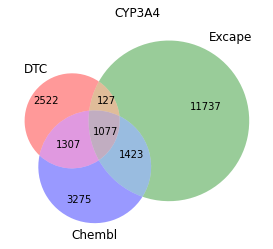

In [ ]:
# Plot venn3 distribution 
d1_s = d1a_df['rdkit_smiles'].tolist()
d2_s = d2a_df['rdkit_smiles'].tolist()
d3_s = d3a_df['rdkit_smiles'].tolist()
#display(d1_s)
#display(d2_s)
dlst = [set(d1_s),set(d2_s),set(d3_s)]

fig = plt.figure()
venn3(dlst, ('DTC', 'Excape','Chembl'))
plt.title(target_name)
#fig.savefig('./plots/'+target_name+'_union_venn.png')
#fig

## Combine d1a_df and d2a_df dataframes 

In [ ]:
comb_df=pd.concat([d1a_df, d2a_df,d3a_df])

In [ ]:
comb_df.columns

Index(['compound_id', 'rdkit_smiles', 'pIC50', 'active'], dtype='object')

In [ ]:
comb_df.head(5)

,compound_id,rdkit_smiles,pIC50,active
0,QEHHTVFVEDPISA-UHFFFAOYSA-N,Cc1cccc(C)c1CNc1nc(-c2cccc(=O)[nH]2)cc2c(C)c(C...,5.771817,0
1,MXDWNZUMSIYAFL-UHFFFAOYSA-N,O=[N+]([O-])c1cc(O)c2c(c1)S(=O)(=O)N=C(Nc1cccc...,4.602060,0
2,QYMLHNYPNZUQCL-UHFFFAOYSA-N,O=C(NC1CC1c1ccccc1)N1CCC(c2nnco2)CC1,5.000000,0
3,SCCIUWBTSOHVEK-VYQNARHWSA-N,C=CCN1CC(=O)N2C(Cc3ccc(O)cc3)C(=O)N(Cc3cccc4c(...,4.602060,0
4,PXISBMZXCKNRIL-UHFFFAOYSA-N,O=C(C(c1ccc(Cl)cc1)c1cncnc1)N1CCN(c2ccc(C(F)(F...,4.744727,0


In [ ]:
ofile=target_name+'_combine_curated.csv'

# column: Response values column
column = 'pIC50'

# tolerance: Percentage of individual respsonse values allowed to different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       comb_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (17818, 8)
List of 'bad' duplicates removed
                       compound_id     pIC50  ...   Perc_Var  VALUE_NUM_std
843    AATCBLYHOUOCTO-UHFFFAOYSA-N  5.000000  ...  75.609756      21.920310
16281  AAVAYKQPRIQKRX-PDBGNUNENA-N  5.820000  ...  56.598183      13.142148
4071   AAVAYKQPRIQKRX-UHFFFAOYSA-N  5.823909  ...  56.569034      13.142148
4739   ABACVOXFUHDKNZ-UHFFFAOYSA-N  5.000000  ...  75.609756      21.920310
16070  ABAOSSRHMRVEJF-JTVQFFFUNA-N  4.500000  ...  80.009704      25.471290
...                            ...       ...  ...        ...            ...
2697   ZZGVWUSRXVYCSC-UHFFFAOYSA-N  6.406240  ...  47.215943       9.706505
7649   ZZHNYWHADLVCEP-UHFFFAOYNA-N  5.260000  ...  65.875577      17.811299
670    ZZHNYWHADLVCEP-UHFFFAOYSA-N  5.002182  ...  67.548178      17.811299
4854   ZZNSTCGBKYJVKR-UHFFFAOYSA-N  4.568636  ...  79.444127      24.970513
18902  ZZYHXFCSTOMZNZ-UICKQJDWNA-N  5.820000  ...  66.167532      16.

In [ ]:
curated_df.to_csv(ofile, index=False)

In [ ]:
curated_df.head()

,compound_id,rdkit_smiles,pIC50,active,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,SCCIUWBTSOHVEK-VYQNARHWSA-N,C=CCN1CC(=O)N2C(Cc3ccc(O)cc3)C(=O)N(Cc3cccc4c(...,4.602060,0,4.602060,NaN,0.0,0
1,NASKVDWGYKOGBO-XDSPJLLDSA-N,COCCCc1cc(CN(C(=O)C2CNCCC2c2ccc(OCCOc3c(Cl)cc(...,4.301030,0,4.301030,NaN,0.0,0
2,VZQLEKQMCOAWNB-LJQANCHMSA-N,CC(Oc1cc(-n2cnc3cc(-c4ccnc(NC5CCN(C)CC5)c4)ccc...,5.643255,0,5.643255,NaN,0.0,0
3,LNFPYTXWNUBAEF-PMACEKPBSA-N,CCN(CC(CC(C)C)NC(=O)OCc1cncs1)CC(CC(C)C)NC(=O)...,6.866461,1,6.866461,NaN,0.0,0
4,CZFUYZPXZGGWKC-SRQUHQSVSA-N,O=C1Nc2ccccc2C1=Cc1ccc2c(C=Cc3ccncc3)n[nH]c2c1,5.784318,0,5.784318,NaN,0.0,0


Post-processing dataset

Total Number of results = 17692
dataset mean = -inf NM
dataset stdev = nan NM
dataset max = 65.70926996097583 NM
dataset min = -inf NM



ValueError: ignored

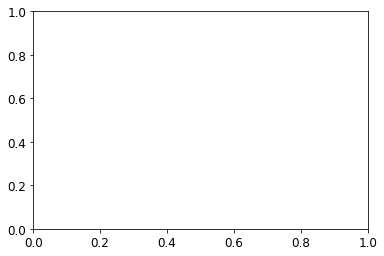

In [ ]:
# Define the outcome column as PXC50
column = 'pIC50'

# # of 'bins' for the histogram
num_bins = 20

title = target_name

units = 'NM'

filepath = ""

data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [ ]:
feat_type='ECFP'
dist_metric='tanimoto'

smiles_lst1 = d1a_df['rdkit_smiles'].tolist()
smiles_lst2 = d2a_df['rdkit_smiles'].tolist()
smiles_lst3 = d3a_df['rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_lst1) > len(smiles_lst2)>len(smiles_lst3) :
    s1,s2,s3=smiles_lst1,smiles_lst2,smiles_lst3
elif len(smiles_lst1) > len(smiles_lst3) >len(smiles_lst2) :
    s1,s2,s3=smiles_lst1,smiles_lst3,smiles_lst2
elif len(smiles_lst2) > len(smiles_lst3) >len(smiles_lst1):
    s1,s2,s3=smiles_lst2,smiles_lst3,smiles_lst1
elif len(smiles_lst2) > len(smiles_lst1) >len(smiles_lst3):
    s1,s2,s3=smiles_lst2,smiles_lst1,smiles_lst3
elif len(smiles_lst3) > len(smiles_lst2) >len(smiles_lst1):
    s1,s2,s3=smiles_lst3,smiles_lst2,smiles_lst1
else:
    s1,s2,s3=smiles_lst3,smiles_lst1,smiles_lst2
calc_type='nearest'
dist_sample=cd.calc_dist_smiles(feat_type,dist_metric,s1,s2,s3,calc_type)

calc_type ['Nc1cc(CN2CCC(C(=O)N3CCC(n4c(=O)n(CCCC(F)(F)F)c5cc(F)ccc54)CC3)CC2)ccn1', 'Cc1ccccc1C(CC(=NO)c1ccncc1)c1ccc(Br)cc1', 'CNC(C)C(=O)NC1CN(C(=O)c2cccnc2)c2ccccc2N(Cc2c(OC)ccc3cc(Br)ccc23)C1=O', 'O=C(C1CC1)N(Cc1cccnc1)c1cc(F)cc(-c2nc3ccccc3s2)c1', 'Fc1ccc(Cn2c(N3CCC(n4ccnc4)CC3)nc3ccccc32)cc1', 'Nc1cc(CN2CCC(F)(C(=O)N3CCC(N4Cc5ccc(F)cc5C4)CC3)CC2)ccn1', 'COCC(=O)NC(Cc1cccc(-c2cncs2)c1)C(O)CNC1CC2(CCC2)Oc2ncc(CC(C)(C)C)cc21', 'Cc1cccc(CC(=O)N2CCc3c2ccc(-c2cn(C)c4ncnc(N)c24)c3F)n1', 'Cc1c(-c2ccccc2)nn(-c2nc(C(=O)O)cs2)c1-c1ccccc1', 'NC1CN(c2cc(-c3cccc(S(=O)(=O)N4CCOCC4)c3)ncn2)CC1c1cc(F)c(F)cc1F', 'COCCCOc1cc(C(=O)N(CC2CNCC2NC(=O)C2CCOCC2)C(C)C)ccc1OC', 'CNC1CCN(C(=O)C(COCc2ccccc2)NC(=O)c2cccnc2Oc2ccc(C(F)(F)F)cc2Cl)C1', 'CNCC(=O)NC(CC(C)C)c1ccccc1N1CCN(C(=O)C(Cc2ccc(Cl)cc2Cl)N2CCCC2=O)CC1', 'C=CCN1CC(=O)N2C(Cc3ccc(O)cc3)C(=O)N(Cc3cccc4c(C(=O)Nc5ccc(OCCCN(C)C)nc5)cn(C)c34)CC2N1C(=O)NCc1ccccc1', 'Cc1nn(-c2ccc(F)cc2)c(NS(=O)(=O)c2ccc(C#N)cc2)c1C(=O)NC(C)C(C)(C)C', 'NC(Cn1c(=O)c(-c2cc

SystemExit: ignored

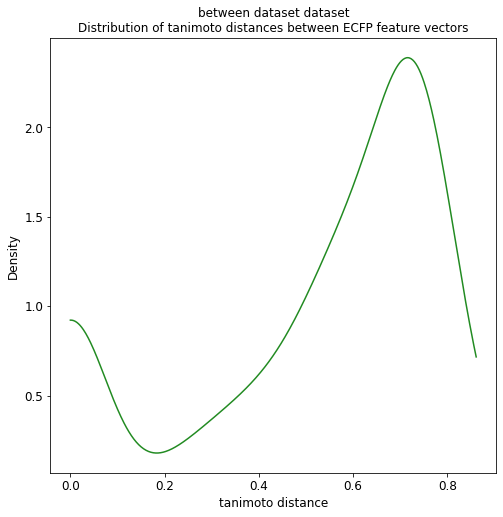

In [ ]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')